In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

# 多变量梯度下降
原理和单变量梯度下降一样，不做解释

In [2]:
def getData(x_1=1,x_2=1):
    data=pd.read_csv("ex1data2.txt",header=None)
    x=data.iloc[:,0:-1]
    y=data.iloc[:,-1]
    #归一化
    # x.iloc[:,0]=x.iloc[:,0]/5000
    # x.iloc[:,1]=x.iloc[:,1]/5
    x=np.insert(np.array(x,dtype=float),0,np.ones(x.shape[0]),axis=1)
    # y=y/100000
    
    theta=np.zeros((1,1+x_1+x_2))
    return x,y,theta
    
def compute(x,theta):
    return x@theta.T

def cost(hx,y,theta,l):
    errorValue=hx-y[:,np.newaxis]
    return (np.power(errorValue,2).sum()+theta@theta.T*l)/(2*hx.shape[0]),errorValue

def gradient_descent(x,errorValue,theta,l):
    return (np.sum(errorValue*x,axis=0)+l*theta)/x.shape[0]

def main(nums,speed,l,x,y,theta):
    costs=[]
    for i in range(nums):    
        hx=compute(x,theta)
        j,errorValue=cost(hx,y,theta,l)
        costs.append(j[0][0])
        decline=gradient_descent(x,errorValue,theta,l)
        theta=theta-speed*decline
    print("最小代价：",costs[-1])
    pl.plot(costs)
    pl.show()
    return theta

#画图，预测值与实际值对比
def test(x,y,theta):
    hx1=x@theta.T
    pl.plot(hx1,label="prediction")
    pl.plot(y,label="actual")
    pl.legend()
    pl.show()
    pl.scatter(x[:,1],y)
    pl.scatter(x[:,1],hx1)
    pl.show()
    pl.scatter(x[:,2],y)
    pl.scatter(x[:,2],hx1)
    pl.show()

## 不使用特征归一化

C:\Users\23155\AppData\Local\Temp\ipykernel_2540\2892432448.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  errorValue=hx-y[:,np.newaxis]


最小代价： 27494788238.383884


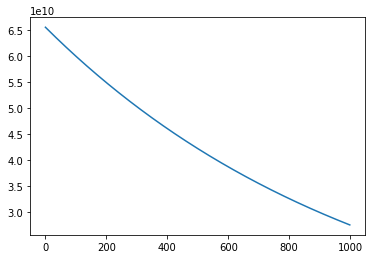

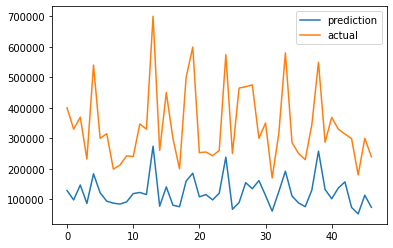

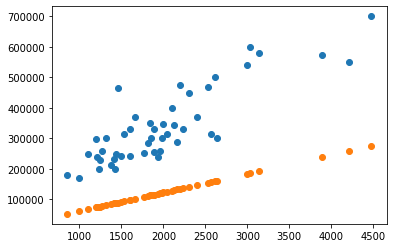

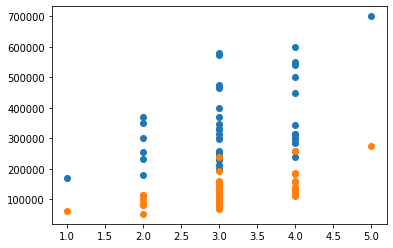

In [3]:
x,y,theta=getData()
theta_no_feature_normalization=main(1000,0.0000000001,0,x,y,theta)
test(x,y,theta_no_feature_normalization)

观察可知，当不使用特征归一化时，需要步长很小才能使下降不易越过代价最低点  
但此时下降的就比较慢，到5000代时才近似水平，代价最小为27494788238.383884

## min-max标准化处理数据
![image_1.png](./image_1.png)

最小代价： 2043280050.6028316


C:\Users\23155\AppData\Local\Temp\ipykernel_2540\2892432448.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  errorValue=hx-y[:,np.newaxis]


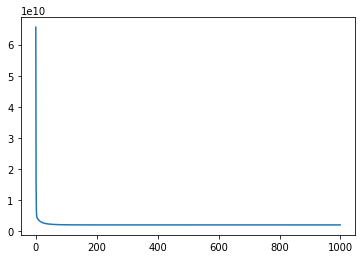

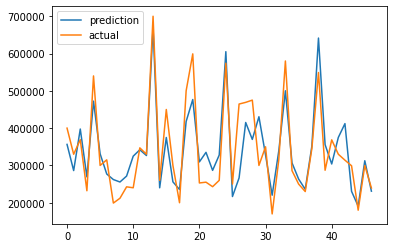

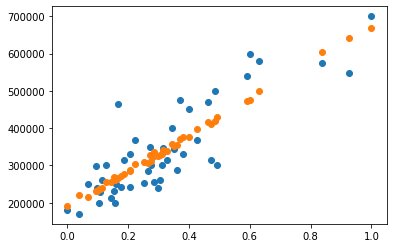

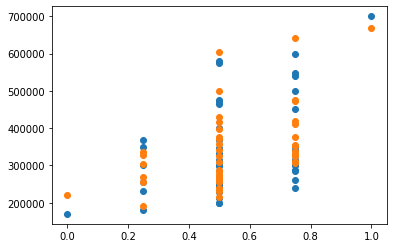

In [4]:
x,y,theta=getData()
x[:,1]=(x[:,1]-np.min(x[:,1]))/(np.max(x[:,1])-np.min(x[:,1]))
x[:,2]=(x[:,2]-np.min(x[:,2]))/(np.max(x[:,2])-np.min(x[:,2]))
theta_feature_normalization=main(1000,1,0,x,y,theta)
test(x,y,theta_feature_normalization)

使用min-max标准化处理数据后，发现此时步长为1的时候就可以很好的下降  
而且下降很快几百代就已经水平，此时最小代价为2043280050.6028316,比不归一化小了很多

## Z-score标准化方法
![image_2.png](./image_2.png)

C:\Users\23155\AppData\Local\Temp\ipykernel_2540\2892432448.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  errorValue=hx-y[:,np.newaxis]


最小代价： 2043280050.6028283


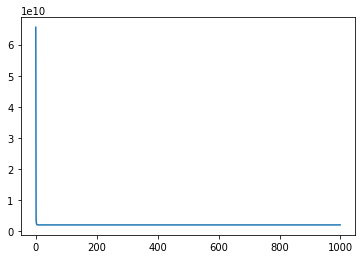

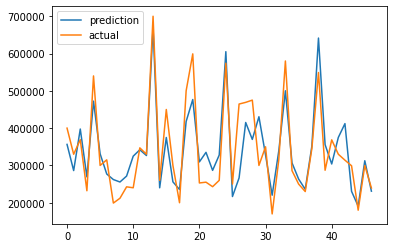

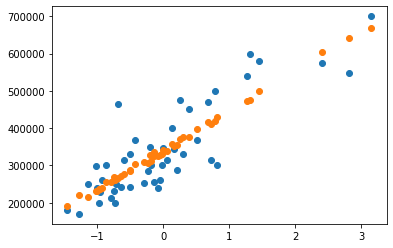

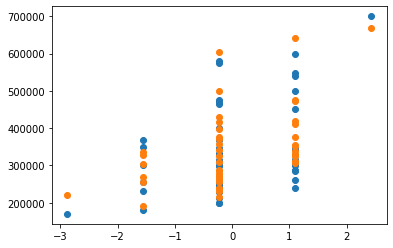

In [5]:
x,y,theta=getData()
x[:,1]=(x[:,1]-np.mean(x[:,1]))/np.std(x[:,1])
x[:,2]=(x[:,2]-np.mean(x[:,2]))/np.std(x[:,2])
theta_feature_normalization=main(1000,1,0,x,y,theta)
test(x,y,theta_feature_normalization)

使用Z-score标准化方法，同样下降快，而且小，最小代价为2043280050.6028283

## 小数定标规范化
![image_3.png](./image_3.png)

C:\Users\23155\AppData\Local\Temp\ipykernel_2540\2892432448.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  errorValue=hx-y[:,np.newaxis]


最小代价： 2043280050.9968476


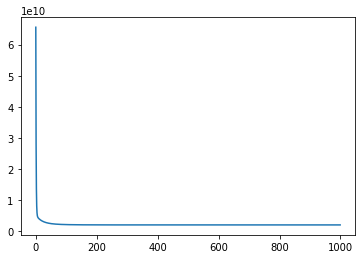

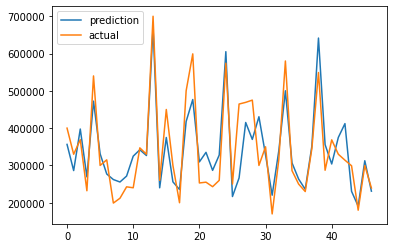

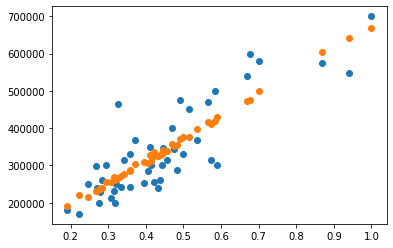

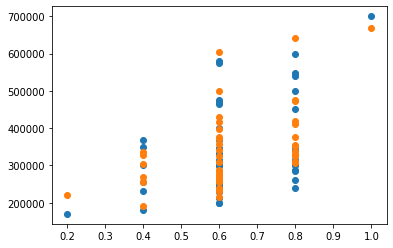

In [6]:
x,y,theta=getData()
x[:,1]=x[:,1]/np.max(x[:,1])
x[:,2]=x[:,2]/np.max(x[:,2])
theta_feature_normalization=main(1000,1,0,x,y,theta)
test(x,y,theta_feature_normalization)

同样下降快，比不归一化下降小，最小代价2043280050.9968476  
三个归一化的最小代价基本相同，说明几乎达到了代价最小

# 多变量正规方程
公式如下
$$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$$

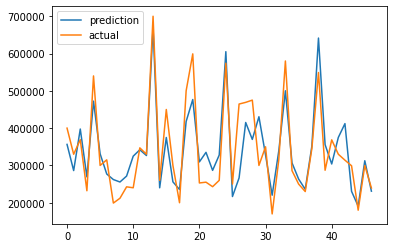

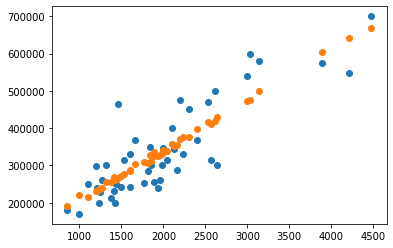

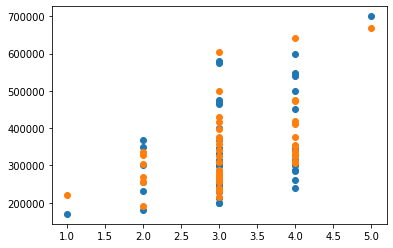

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [7]:
def normal_equations(x,y):
    theta=np.linalg.inv(x.T@x)@x.T@y
    return theta
def main_1():
    x,y,theta=getData()
    theta=normal_equations(x,y)

    test(x,y,theta)
    return theta
main_1()

## 观察数据集分布情况，判断是否使用多项式

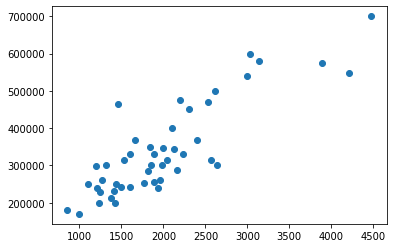

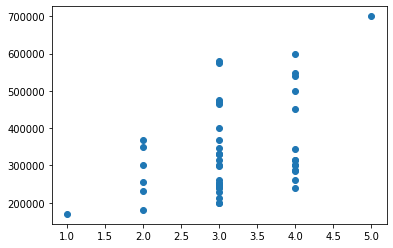

In [8]:
x,y,theta=getData()
pl.scatter(x[:,1],y)
pl.show()
pl.scatter(x[:,2],y)
pl.show()

观察可知，特征一与输出有较为强烈的线性关系，但是特征二与输出的线性关系则不那么明显。  
若使用多项式回归可能会有更好的效果

In [9]:
def polynomial(x_1,x_2,x):
    for i in range(1,x_1):
        x=np.append(x,np.power(x[:,1],i+1)[:,np.newaxis],axis=1)
    for i in range(1,x_2):
        x=np.append(x,np.power(x[:,2],i+1)[:,np.newaxis],axis=1)
    return x

### 使用高次多项式
均为6次

最小代价： 1856246120.6933959


C:\Users\23155\AppData\Local\Temp\ipykernel_2540\2892432448.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  errorValue=hx-y[:,np.newaxis]


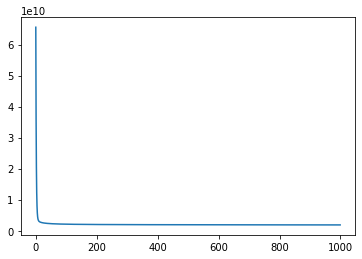

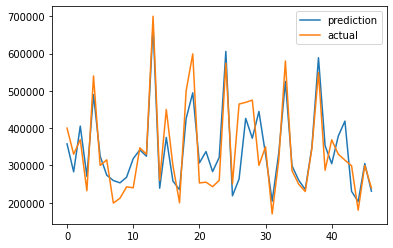

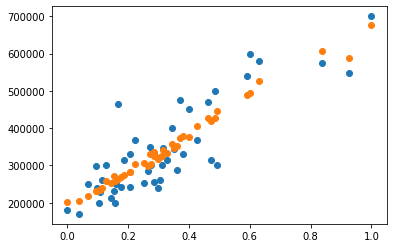

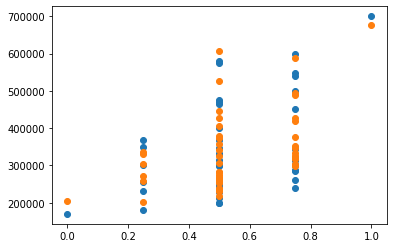

In [10]:
x,y,theta=getData(x_1=6,x_2=6)
x[:,1]=(x[:,1]-np.min(x[:,1]))/(np.max(x[:,1])-np.min(x[:,1]))
x[:,2]=(x[:,2]-np.min(x[:,2]))/(np.max(x[:,2])-np.min(x[:,2]))
x=polynomial(6,6,x)
theta_mul=main(1000,1,0,x,y,theta)
test(x,y,theta_mul)


在正则化之后使用高次多项式，最小代价下降到了1754427595.0030284  
比正则化下降得多

## 总结
归一化后，相比与不归一化，其下降的更快，在相同的代数情况下，下降效果更好。  
观察数据集，发现特征二的线性不是那么明显，可能使用高阶拟合效果更好  
使用高阶后，发现拟合效果确实好了一点，代价下降了